In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis testing: Chi-Square Test within the Montana Library case study

In this notebook we perform a chi-square test with the data from the Library of Montana University case study, applying a post-hoc correction to perform pairwise tests and find the true winner.

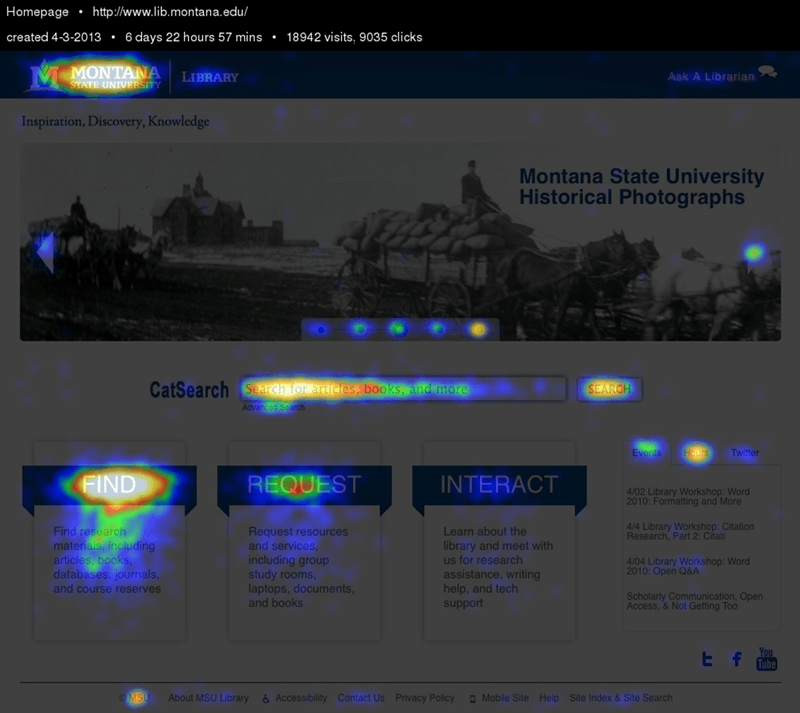

In [3]:
version1="/Users/tsveti/Desktop/montana-state-library-a-b-test/Version1.csv"
version2="/Users/tsveti/Desktop/montana-state-library-a-b-test/Version2.csv"
version3="/Users/tsveti/Desktop/montana-state-library-a-b-test/Version3.csv"
version4="/Users/tsveti/Desktop/montana-state-library-a-b-test/Version4.csv"
version5="/Users/tsveti/Desktop/montana-state-library-a-b-test/Version5.csv"
pd.set_option('display.max_colwidth', 100)

In [4]:
version1=pd.read_csv("/Users/tsveti/Desktop/montana-state-library-a-b-test/Version1.csv")
version2=pd.read_csv("/Users/tsveti/Desktop/montana-state-library-a-b-test/Version2.csv")
version3=pd.read_csv("/Users/tsveti/Desktop/montana-state-library-a-b-test/Version3.csv")
version4=pd.read_csv("/Users/tsveti/Desktop/montana-state-library-a-b-test/Version4.csv")
version5=pd.read_csv("/Users/tsveti/Desktop/montana-state-library-a-b-test/Version5.csv")

Q1- What was the click-through rate for each version?

In [5]:
version4

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,74,a,FIND,631,True,Homepage Version 4 - Help • http://www.lib.montana.edu/index4.php
1,66,input,s.q,364,True,"created 5-29-2013 • 20 days 4 hours 59 mins • 3180 visits, 1717 clicks"
2,72,a,lib.montana.edu/find/,139,True,NaN
3,133,area,Montana State University - Home,122,False,NaN
4,83,a,REQUEST,72,True,NaN
5,103,a,Hours,68,True,NaN
6,67,button,Search,59,True,NaN
7,92,a,HELP,38,True,NaN
8,101,a,News,26,True,NaN
9,127,a,Contact Us,17,True,NaN


Questions:

In [7]:
click_through_rate_interact=(0/10283)* 100

In [8]:
click_through_rate_connect=(53/2742)*100

In [9]:
click_through_rate_learn=(0/2747)*100

In [10]:
click_through_rate_help=(38/3180)*100

In [11]:
click_through_rate_services=(45/2064)*100

In [12]:
click_through_rate_interact, click_through_rate_connect, click_through_rate_learn, click_through_rate_help, click_through_rate_services

(0.0, 1.9328956965718453, 0.0, 1.1949685534591197, 2.1802325581395348)

Q2. Which version was the winner?

As we can see from above calculations, the clear winner with the highest CTR is "Service", i.e click_through_rate_services. 

Q3. Do the results seem conclusive?

There are 4 versions with pretty close results. The final CTR is not conclusive. We dont have clear winner(except for click_through_rate_services).

## 1.&nbsp;State the Null Hypothesis and the Alternative Hypothesis.

Null Hypothesis: The 5 versions of the button are equally likley to receive clicks, and any observed differences would be due to chance.

Alternative Hypothesis: The observed differences are not due to chance: there is at least one version that got so many more/less clicks than others that this can hardly be explained just by chance.

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

Since the project is about website A/B testing, we can afford to be more flexibale when choosing alpha. It was decided that a relatively high alpha was acceptable in this case. 

In [240]:
aplha=0.1

## 3.&nbsp; Collect data that is random and independent



Q- How many clicks did each element get?

In [14]:
interact_clicks=version1.loc[version1["Name"] == "INTERACT", "No. clicks"].iloc[0]

In [15]:
connect_clicks=version2.loc[version2["Name"] == "CONNECT", "No. clicks"].iloc[0]

In [16]:
connect_clicks

53

In [17]:
learn_clicks=version3.loc[version3["Name"] == "LEARN", "No. clicks"].iloc[0]

In [18]:
learn_clicks

21

In [19]:
help_clicks=version4.loc[version4["Name"] == "HELP", "No. clicks"].iloc[0]

In [20]:
help_clicks

38

In [21]:
services_clicks=version5.loc[version5["Name"] == "SERVICES", "No. clicks"].iloc[0]

In [22]:
services_clicks

45

How many visits did each page get?

In [23]:
interacts_visits=10283
connect_visists=2742
learn_visits=2747
help_visits=3180
services_visits=2064

Now, we need to calculate the number of visitors who didnt click on the button.

In [24]:
interacts_no_clicks=interacts_visits - interact_clicks

In [25]:
connect_no_clicks=connect_visists - connect_clicks

In [26]:
learn_no_clicks=learn_visits - learn_clicks

In [27]:
help_no_clicks=help_visits - help_clicks

In [28]:
services_no_clicks=services_visits - services_clicks

In [29]:
a_b_no_clicks=[interacts_no_clicks,connect_no_clicks,learn_no_clicks,help_no_clicks,services_no_clicks]

In [30]:
a_b_clicks=[interact_clicks, connect_clicks, learn_clicks, help_clicks, services_clicks]

In [31]:
a_b_clicks

[42, 53, 21, 38, 45]

In [32]:
a_b_no_clicks

[10241, 2689, 2726, 3142, 2019]

In [33]:
a_b_clicks

[42, 53, 21, 38, 45]

## Combining clicks and no-clicks in one table.

In [34]:
a_b_no_clicks=[interacts_no_clicks,connect_no_clicks,learn_no_clicks,help_no_clicks, services_no_clicks]

In [35]:
a_b_no_clicks

[10241, 2689, 2726, 3142, 2019]

In [36]:
clicks_no_clicks = pd.DataFrame(data=[a_b_clicks, a_b_no_clicks],
                                columns=["Interact", "Connect", "Learn", "Help", "Services"], 
                                index=["click", "no-click"])


In [37]:
clicks_no_clicks

,Interact,Connect,Learn,Help,Services
click,42,53,21,38,45
no-click,10241,2689,2726,3142,2019


In [38]:
clicks_no_clicks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, click to no-click
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Interact  2 non-null      int64
 1   Connect   2 non-null      int64
 2   Learn     2 non-null      int64
 3   Help      2 non-null      int64
 4   Services  2 non-null      int64
dtypes: int64(5)
memory usage: 96.0+ bytes


In [40]:
clicks_no_clicks

,Interact,Connect,Learn,Help,Services
click,42,53,21,38,45
no-click,10241,2689,2726,3142,2019


## 4.&nbsp; Calculate the test result

In [237]:
chisq, pvalue, df, expected=stats.chi2_contingency(clicks_no_clicks)

In [238]:
pvalue

4.852334301093838e-20

In [242]:
alpha=0.1

## 5.&nbsp; Interpret the test result

In [243]:
if pvalue > alpha:
    print("Do not reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


Our Null Hypothesis was rejected! This means that at least one of our five website versions was significantly better or worst in performance, compared to the other four. Remember - our Null Hypothesis stated that all website versions perform the same.  

## How do we decide who's the winner?

As we have seen from the initial data the two versions that generated the most clicks are "Connect" with "Services". An additional Pos Hoc Tests could be performed to declare the clear winner. 

## Plots

Creating a heatmap with a different categories of clicks and no_clicks. 

Text(33.0, 0.5, 'Categories')

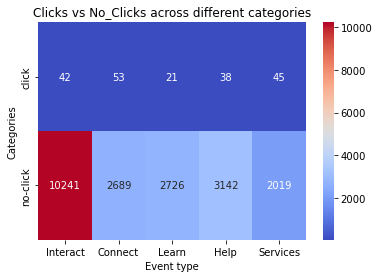

In [251]:
sns.heatmap(data=clicks_no_clicks, annot=True, cmap="coolwarm", fmt="d")
plt.title("Clicks vs No_Clicks across different categories")
plt.xlabel("Event type")
plt.ylabel("Categories")